#  Analiza: Ocene filmov vs. Dobiček
V tej projektni nalogi analiziramo povezavo med finančnim uspehom filmov (pridobljenih s strani Box Office Mojo)
in ocenami uporabnikov (pridobljenih prek TMDb). Osredotočili smo se na:

- Najbolj dobičkonosne filme vseh časov (glede na bruto zaslužek)
- Najbolje ocenjene filme (glede na oceno uporabnikov)
- Primerjavo filmov, ki se pojavljajo v obeh seznamih
- Dodatne metrike, kot je ROI (Return on Investment)

## Ključni cilji analize:

1. Ugotoviti, ali obstaja povezava med zaslužkom in oceno filmov.
2. Vizualizirati razlike med uspešnostjo in priljubljenostjo.
3. Oceniti, kateri filmi izstopajo po ROI.

Podatki so bili pridobljeni iz:
- TMDb (prek API-ja)
- Box Office Mojo (z uporabo `pandas.read_html`)

In [11]:
import pandas as pd
from izracun_roi import izracunaj_roi
import graficni_prikaz 

tmdb = pd.read_csv("data/filmi_tmdb.csv")
bo = pd.read_csv("data/bo_mojo.csv")


##  Združevanje podatkov po naslovu in letu
Spodnja tabela prikazuje podatke o najbolje ocenjenih filmih, vključno z oceno, prihodki, proračunom in dolžino filma. Vidimo tudi, kateri izmed 200 najbolj dobičkonosnih filmov so pravtako med bolje ocenjenimi. 

In [12]:
df = pd.merge(tmdb, bo, on=["title", "year"], suffixes=("_tmdb", "_bo"))
df = df.drop("revenue_tmdb", axis=1)
df["roi"] = df.apply(lambda x: izracunaj_roi(x["budget"], x["revenue_bo"]), axis=1)
df

,title,year,release_date,vote_average,vote_count,budget,runtime,revenue_bo,roi
0,The Dark Knight,2008,2008-07-16,8.522,34062,185000000,152,1009057329,4.454364
1,The Lord of the Rings: The Return of the King,2003,2003-12-17,8.488,25245,94000000,201,1138585547,11.112612
2,Forrest Gump,1994,1994-06-23,8.468,28379,55000000,142,678226465,11.331390
3,Interstellar,2014,2014-11-05,8.456,37421,165000000,169,758690230,3.598123
4,The Lord of the Rings: The Fellowship of the Ring,2001,2001-12-18,8.423,26143,93000000,179,888483037,8.553581
5,The Lord of the Rings: The Two Towers,2002,2002-12-18,8.408,22720,79000000,179,938532865,10.880163
6,Inception,2010,2010-07-15,8.400,37661,160000000,148,839381898,4.246137
7,Spider-Man: Across the Spider-Verse,2023,2023-05-31,8.347,7695,100000000,140,690824738,5.908247
8,The Lion King,1994,1994-06-15,8.300,18857,45000000,89,979161373,20.759142
9,Avengers: Endgame,2019,2019-04-24,8.240,26499,356000000,181,2799439100,6.863593


##  Korelacija ocene in dobička
Težko rečemo, da sta ocena in dobiček tesno povezana, vendar je opazno, da je več podatkov v levem spodnjem delu. Torej filmi z nižjo oceno zaslužijo tudi nekoliko manj.

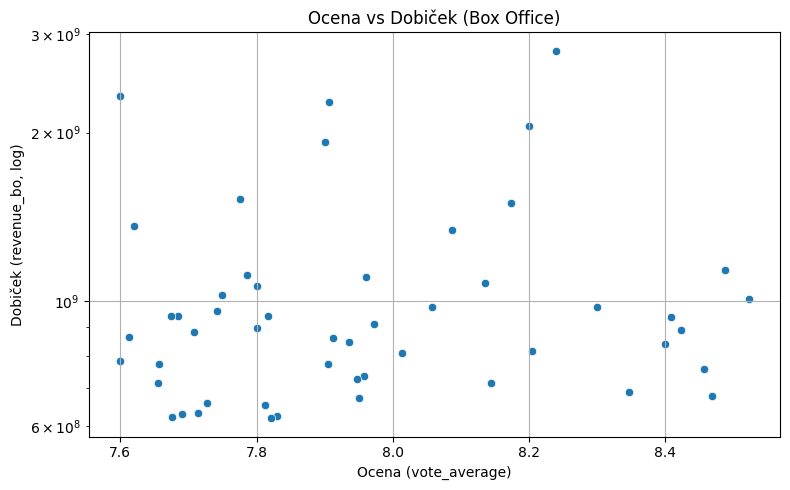

In [13]:
graficni_prikaz.graf_1_vote_vs_revenue(df)

## Razmerje med proračunom in zaslužkom
V spodnjem grafu lahko vidimo, da je med proračunom in zaslužkom filmov več povezave kot pri prejšnjem grafu, torej filmi z višjim zaslužkom imajo običajno tudi večji proračun.

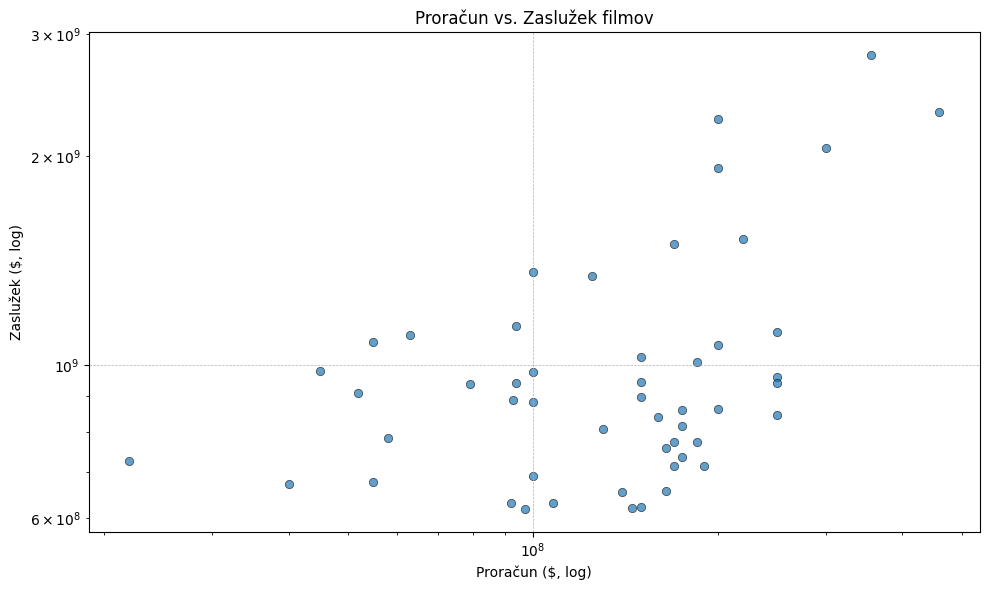

In [14]:
graficni_prikaz.graf_2_budget_vs_revenue(df)

## Top 10 najbolje ocenjenih filmov (z dobičkom)

In [15]:
df.sort_values("vote_average", ascending=False)[["title", "vote_average", "revenue_bo"]].head(10)

,title,vote_average,revenue_bo
0,The Dark Knight,8.522,1009057329
1,The Lord of the Rings: The Return of the King,8.488,1138585547
2,Forrest Gump,8.468,678226465
3,Interstellar,8.456,758690230
4,The Lord of the Rings: The Fellowship of the Ring,8.423,888483037
5,The Lord of the Rings: The Two Towers,8.408,938532865
6,Inception,8.400,839381898
7,Spider-Man: Across the Spider-Verse,8.347,690824738
8,The Lion King,8.300,979161373
9,Avengers: Endgame,8.240,2799439100


## Top 10 najbolj dobičkonosnih filmov

In [16]:
df.sort_values("revenue_bo", ascending=False)[["title", "vote_average", "revenue_bo"]].head(10)

,title,vote_average,revenue_bo
9,Avengers: Endgame,8.240,2799439100
50,Avatar: The Way of Water,7.600,2320250281
26,Titanic,7.906,2264812968
10,Avengers: Infinity War,8.200,2052415039
23,Spider-Man: No Way Home,7.900,1921426073
35,The Avengers,7.775,1520538536
12,Top Gun: Maverick,8.174,1495696292
48,The Super Mario Bros. Movie,7.620,1360847665
15,Harry Potter and the Deathly Hallows: Part 2,8.087,1342505340
1,The Lord of the Rings: The Return of the King,8.488,1138585547


## Boxplot ROI po letu

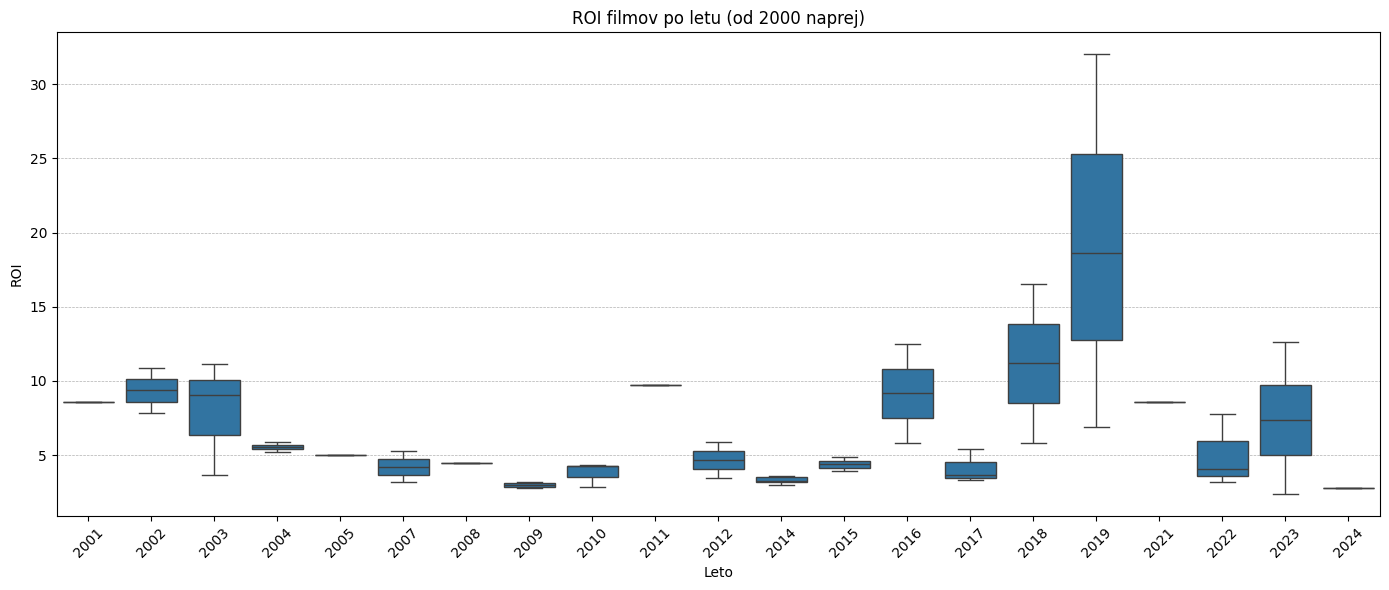

In [17]:
graficni_prikaz.graf_3_roi_po_letu(df)

## Razmerje med oceno in ROI

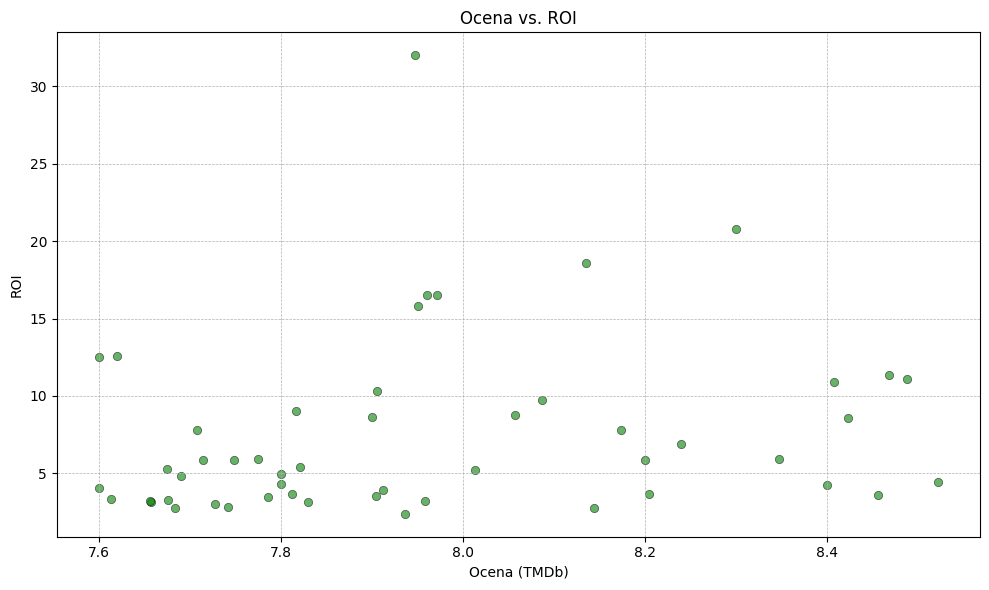

In [18]:
graficni_prikaz.graf_4_ocena_vs_roi(df)


## Povezave z dolžino filma

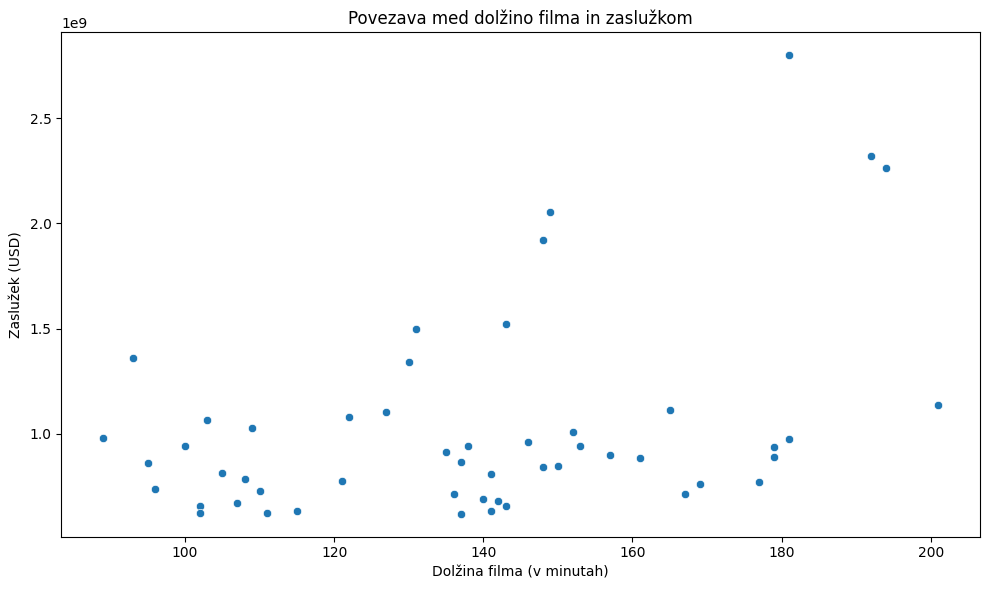

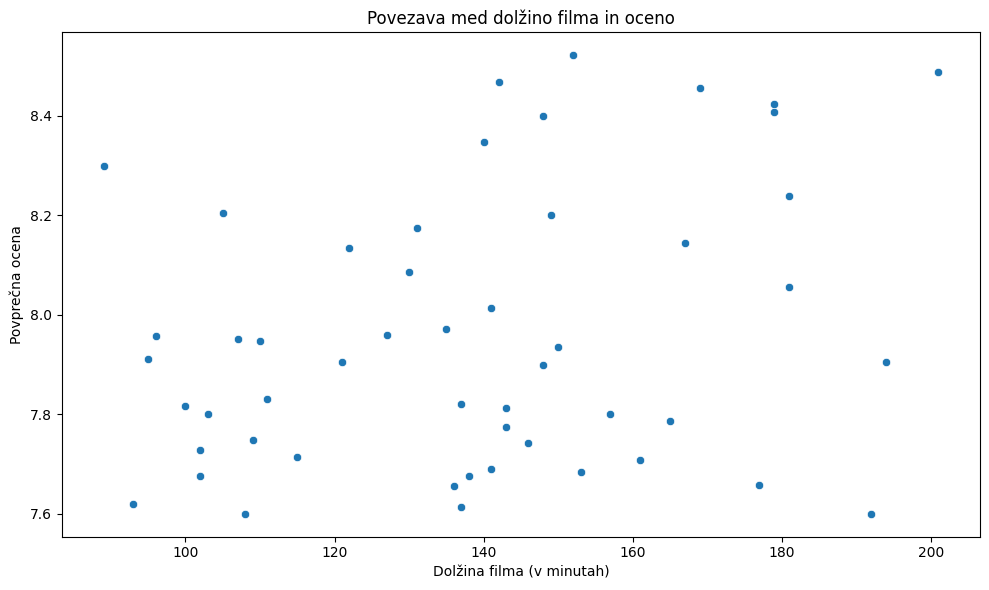

In [19]:
graficni_prikaz.graf_5_6_analiza_trajanja(df)

## Korelacijska matrika

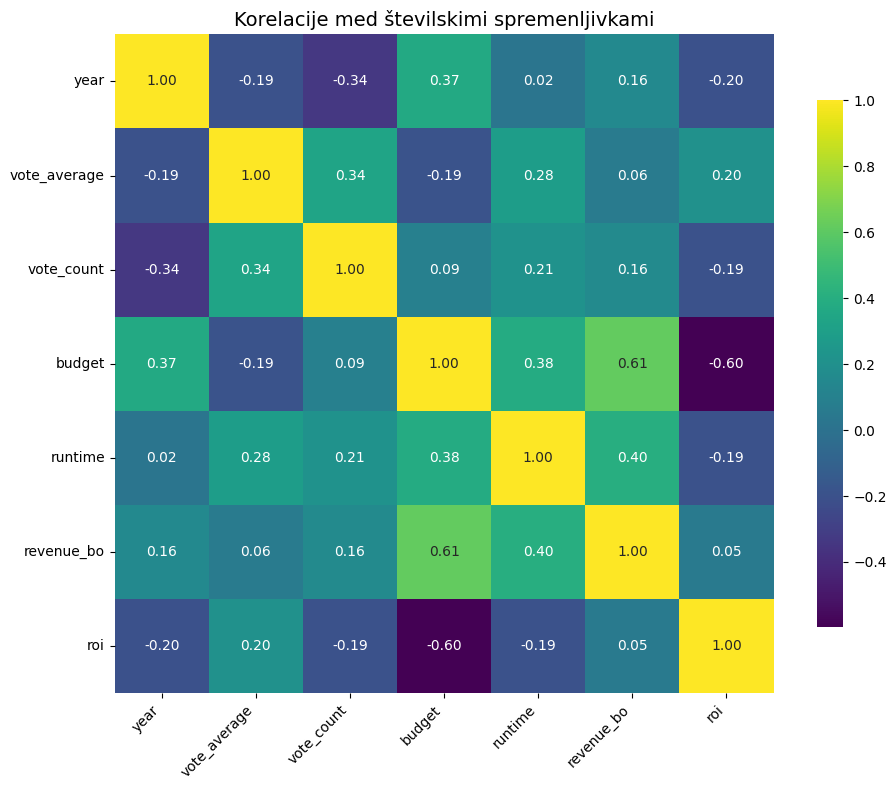

In [20]:
graficni_prikaz.graf_7_korelacijska_matrika(df)

## Zaključek
Analiza pokaže, da visoka ocena filma ne pomeni nujno tudi visokih prihodkov. Nekateri filmi z zelo visokimi ROI niso med najbolje ocenjenimi, medtem ko imajo nekateri visoko ocenjeni filmi nizek ROI zaradi visokega proračuna. Kombinacija dobrih ocen in skrbno nadzorovanih stroškov se zdi ključna za uspeh.